# import packages

In [1]:
# before running the code, you might need to pip install tensorflow
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

# additional set up

In [2]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

# constants and parameters
DATA_PATH = './data/'
IMG_PATH = './'

# You must keep the json file in your current working directory.
# load data 
with open(f'data_file_20181203.json') as f:
    data = json.load(f)

# create data frame

In [3]:
df = {'Name': np.zeros(len(data['quantlets'])), 
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])), 
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

# extract the columns we need

In [4]:
counter=0
for c, i in enumerate(data['quantlets']):
    print(i)
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        counter+=1
print(f'Could not load {counter} quantlets.')
df = df[df['is_debuggable']==True]

ADM/HermPolyPlot/Metainfo.txt
ARR/ARRboxage/Metainfo.txt
ARR/ARRboxgscit/Metainfo.txt
ARR/ARRboxhb/Metainfo.txt
ARR/ARRcormer/Metainfo.txt
ARR/ARRdenmer2d/Metainfo.txt
ARR/ARRdenmer3d/Metainfo.txt
ARR/ARRhexage/Metainfo.txt
ARR/ARRhexcit/Metainfo.txt
ARR/ARRhexhin/Metainfo.txt
ARR/ARRhismer/Metainfo.txt
ARR/ARRmosage/Metainfo.txt
ARR/ARRmosagegr/Metainfo.txt
ARR/ARRmossub/Metainfo.txt
ARR/ARRpcpgscit/Metainfo.txt
ARR/ARRpcphb/Metainfo.txt
ARR/ARRpcpmer/Metainfo.txt
ARR/ARRpcprp/Metainfo.txt
ARR/ARRqrqqhb/Metainfo.txt
ARR/ARRscaage/Metainfo.txt
ARR/ARRscamer/Metainfo.txt
Adaptive_Penalized_Macro_Factors/Metainfo.txt
BCS-1/BCS_Kernel_nhTemp/Metainfo.txt
BCS-1/BCS_MLRleaps/Metainfo.txt
BCS-1/BCS_RANDU/Metainfo.txt
BCS/BCS_ARM/MetaInfo.txt
BCS/BCS_ArchimedeanContour/MetaInfo.txt
BCS/BCS_BarGraphs/MetaInfo.txt
BCS/BCS_Bincdf/MetaInfo.txt
BCS/BCS_Binhist/MetaInfo.txt
BCS/BCS_Binhyper/MetaInfo.txt
BCS/BCS_Binnorm/MetaInfo.txt
BCS/BCS_BinormalDensity/MetaInfo.txt
BCS/BCS_Binpdf/MetaInfo.txt
BC

FRM/FRM_GT/Metainfo.txt
FRM/FRM_SRISK/Metainfo.txt
FRM/FRM_VIX/Metainfo.txt
FRM/FRM_compare_nf/Metainfo.txt
FRM/FRM_compare_of/Metainfo.txt
FRM/FRM_compare_ws/Metainfo.txt
FRM/FRM_download_data/Metainfo.txt
FRM/FRM_lambda_series/Metainfo.txt
FRM/FRM_parallel_compute/Metainfo.txt
FRM/FRM_per_cap/Metainfo.txt
FVC/FVCConvNet/metainfo.txt
FVC/FVCEurostoxxLDA/metainfo.txt
FVC/FVCEurostoxxOLS/metainfo.txt
FVC/FVCEurostoxxPLS/metainfo.txt
FVC/FVCbarplot/metainfo.txt
FVC/FVCcall_API/metainfo.txt
FVC/FVCconf_API/metainfo.txt
FVC/FVCconf_CNN/metainfo.txt
FVC/FVCconf_finetune/metainfo.txt
FVC/FVCcorr/metainfo.txt
FVC/FVCcorrcircle/metainfo.txt
FVC/FVCemo_vs_stock/metainfo.txt
FVC/FVCfinetuning/metainfo.txt
FVC/FVCheatmap/metainfo.txt
FVC/FVCload_dataset/metainfo.txt
FVC/FVCperformance/metainfo.txt
FVC/FVCpressdays/metainfo.txt
Face-Recognition/FaceRecognition_FLDA/MetaInfo.txt
Face-Recognition/FaceRecognition_PCA/MetaInfo.txt
Face-Recognition/FaceRecognition_SVM/MetaInfo.txt
Face-Recognition/Face

MSR-ToDo/MSRevt1/Metainfo.txt
MSR-ToDo/MSRevt2/Metainfo.txt
MSR-ToDo/MSRevt3/Metainfo.txt
MSR-ToDo/MSRfibonacci/Metainfo.txt
MSR-ToDo/MSRgpdist/Metainfo.txt
MSR-ToDo/MSRlambda_smoothing_utd/Metainfo.txt
MSR-ToDo/MSRlog_returns/Metainfo.txt
MSR-ToDo/MSRnonp_utd/Metainfo.txt
MSR-ToDo/MSRpdf_cop_Clayton/Metainfo.txt
MSR-ToDo/MSRpdf_cop_Frank/Metainfo.txt
MSR-ToDo/MSRpdf_cop_Gumbel/Metainfo.txt
MSR-ToDo/MSRpdf_cop_tStudent/Metainfo.txt
MSR-ToDo/MSRportfolio/Metainfo.txt
MSR-ToDo/MSRportfolio_est/Metainfo.txt
MSR-ToDo/MSRportfolio_log_returns/Metainfo.txt
MSR-ToDo/MSRsca_bmw_vw/Metainfo.txt
MSR-ToDo/MSRsca_log_returns/Metainfo.txt
MSR-ToDo/MSRsca_sie_vw/Metainfo.txt
MSR-ToDo/MSRsiemens_log_returns/Metainfo.txt
MSR-ToDo/MSRstdlogret/Metainfo.txt
MSR-ToDo/MSRtailGPareto/Metainfo.txt
MSR-ToDo/MSRtailHill/Metainfo.txt
MSR-ToDo/MSRtail_dep_normal/Metainfo.txt
MSR-ToDo/MSRtail_dep_tStudent/Metainfo.txt
MSR-ToDo/MSRtaildepVsVarIndex/Metainfo.txt
MSR-ToDo/MSRtaildep_tcdf/Metainfo.txt
MSR-ToDo/MSRta

MVA/QID-1213-MVAincomeLi/Metainfo.txt
MVA/QID-1214-MVAmdscarm/Metainfo.txt
MVA/QID-1215-MVAnpcabank/Metainfo.txt
MVA/QID-1216-MVAnpcabanki/Metainfo.txt
MVA/QID-1223-MVApcabanki/Metainfo.txt
MVA/QID-1225-MVApcasimu/Metainfo.txt
MVA/QID-1226-MVAportfol/Metainfo.txt
MVA/QID-1227-MVAportfol_IBM_Ford/Metainfo.txt
MVA/QID-1229-MVAreturns/Metainfo.txt
MVA/QID-1230-MVAsample1000/Metainfo.txt
MVA/QID-1233-MVAsir2data/Metainfo.txt
MVA/QID-1234-MVAsirdata/Metainfo.txt
MVA/QID-1235-MVAtdis/Metainfo.txt
MVA/QID-1264-MVAcauchy/Metainfo.txt
MVA/QID-1265-MVAcorrCar/Metainfo.txt
MVA/QID-1266-MVAcorrEyeHair/Metainfo.txt
MVA/QID-1267-MVAgausscauchy/Metainfo.txt
MVA/QID-1268-MVAsimdep1/Metainfo.txt
MVA/QID-1477-MVAghadatail/Metainfo.txt
MVA/QID-1478-MVAghdis/Metainfo.txt
MVA/QID-1479-MVAghdistail/Metainfo.txt
MVA/QID-1480-MVAghsurface/Metainfo.txt
MVA/QID-1481-MVAlaplacedis/Metainfo.txt
MVA/QID-1482-MVAtdistail/Metainfo.txt
MVA/QID-1484-MVAboxbank6/Metainfo.txt
MVA/QID-1485-MVAboxcar/Metainfo.txt
MVA/QID-

SFE/QID-2285-SFEvar_block_max_backtesting/Metainfo.txt
SFE/QID-2287-SFEvar_block_max_params/Metainfo.txt
SFE/QID-2292-SFEvar_pot_backtesting/Metainfo.txt
SFE/QID-2293-SFEvar_pot_params/Metainfo.txt
SFE/QID-2306-SFEPortfolioLossDensity/Metainfo.txt
SFE/QID-2368-ETL/Metainfo.txt
SFE/QID-2369-SFEETLGaussTr1/Metainfo.txt
SFE/QID-2385-SFEbaseCorr/Metainfo.txt
SFE/QID-2386-BaseCorrGaussModelCDO/Metainfo.txt
SFE/QID-2387-lowerTrLossGauss/Metainfo.txt
SFE/QID-2388-SFEcompCorr/Metainfo.txt
SFE/QID-2446-SFESpecWN/Metainfo.txt
SFE/QID-2456-SFEFreqFilt/Metainfo.txt
SFE/QID-2457-SFEPer/Metainfo.txt
SFE/QID-2594-SFEArchCopDensity/Metainfo.txt
SFE/QID-3125-SFEDAXlogreturns/Metainfo.txt
SFE/QID-3126-SFEDeltahedgingdepend/Metainfo.txt
SFE/QID-3143-SFEdown-and-out/Metainfo.txt
SFE/QID-3144-SFEdvegadtime/Metainfo.txt
SFE/QID-3145-SFEevt1/Metainfo.txt
SFE/QID-3146-SFEevt2/Metainfo.txt
SFE/QID-3147-SFEexerput/Metainfo.txt
SFE/QID-3148-SFEReturns/Metainfo.txt
SFE/QID-3149-SFEVolaTermStructure/Metainfo.txt
S

SMS2/SMSclushealth05/Metainfo.txt
SMS2/SMScluskmhealth/Metainfo.txt
SMS2/SMSconjars/Metainfo.txt
SMS2/SMSconjexmp/Metainfo.txt
SMS2/SMScorrcarm/Metainfo.txt
SMS2/SMScorrcrime/Metainfo.txt
SMS2/SMScorrfood/Metainfo.txt
SMS2/SMScorrhealth/Metainfo.txt
SMS2/SMScovbank/Metainfo.txt
SMS2/SMSdecobank/Metainfo.txt
SMS2/SMSdecofood/Metainfo.txt
SMS2/SMSdecotime/Metainfo.txt
SMS2/SMSdenbank/Metainfo.txt
SMS2/SMSdete2pull/Metainfo.txt
SMS2/SMSdeterpull/Metainfo.txt
SMS2/SMSdiscbaycar/Metainfo.txt
SMS2/SMSdisccar/Metainfo.txt
SMS2/SMSdisfbank/Metainfo.txt
SMS2/SMSdisfbank2/Metainfo.txt
SMS2/SMSdisfwais/Metainfo.txt
SMS2/SMSdisthealth05/Metainfo.txt
SMS2/SMSdrafcar/Metainfo.txt
SMS2/SMSellipse/Metainfo.txt
SMS2/SMSeppbank/Metainfo.txt
SMS2/SMSfacenorm/Metainfo.txt
SMS2/SMSfactbank/Metainfo.txt
SMS2/SMSfactfood/Metainfo.txt
SMS2/SMSfacthletic/Metainfo.txt
SMS2/SMSfactsigma/Metainfo.txt
SMS2/SMSfactuscrime/Metainfo.txt
SMS2/SMSfactushealth/Metainfo.txt
SMS2/SMSfactvocab/Metainfo.txt
SMS2/SMShiscar/M

STF-ToDo/11/simHeston/Metainfo.txt
STF-ToDo/11/simNHPPALP/Metainfo.txt
STF-ToDo/11/simNHPP_/Metainfo.txt
STF-ToDo/11/stab_reg_kw/Metainfo.txt
STF-ToDo/11/stabcull/Metainfo.txt
STF-ToDo/11/stabreg/Metainfo.txt
STF-ToDo/HestonVanillaSmile/Metainfo.txt
STF-ToDo/STFcat08_Matlab/Metainfo.txt
STF-ToDo/STFcat09_Matlab/Metainfo.txt
STF-ToDo/STFhes03_RUN/Metainfo.txt
STF-ToDo/STFloss01_RUN/Metainfo.txt
STF-ToDo/STFloss08t_RUN/Metainfo.txt
STF-ToDo/STFstab05_garchset/Metainfo.txt
STF-ToDo/STFstab06_garchset/Metainfo.txt
STF-ToDo/_Done/STF2svm01/Metainfo.txt
STF-ToDo/_Done/STF2tvch01/Metainfo.txt
STF-ToDo/_Done/STF2tvch02/Metainfo.txt
STF-ToDo/_Done/STF2tvch03/Metainfo.txt
STF-ToDo/_Done/STF2tvch04/Metainfo.txt
STF-ToDo/_Done/STF2tvch06/Metainfo.txt
STF-ToDo/_Done/STF2tvch07/Metainfo.txt
STF-ToDo/_Done/STF2vswapstrike/Metainfo.txt
STF-ToDo/_Done/STFcat01/Metainfo.txt
STF-ToDo/_Done/STFcat02/Metainfo.txt
STF-ToDo/_Done/STFcat03/Metainfo.txt
STF-ToDo/_Done/STFcat04/Metainfo.txt
STF-ToDo/_Done/STFca

TENET/TENET_total_connectedness/Metainfo.txt
TENET/TENET_total_in_out_groups/Metainfo.txt
TENET/TENET_total_in_out_individual/Metainfo.txt
TERES/TERES_ES_Analytical/Metainfo.txt
TERES/TERES_ExpectileQuantileDiff/Metainfo.txt
TERES/TERES_ExpectileQuantileDiffMulti/Metainfo.txt
TERES/TERES_RollingWindow/Metainfo.txt
TERES/TERES_Standardization/Metainfo.txt
TXT/TXTBreweries/Metainfo.txt
TXT/TXTMcDbl/Metainfo.txt
TXT/TXTMcDlm/Metainfo.txt
TXT/TXTSimulation/Metainfo.txt
TXT/TXTSimulationAttention/Metainfo.txt
TXT/TXTfpblexical/Metainfo.txt
TXT/TXTfpbsupervised/Metainfo.txt
TXT/TXTnlp/Metainfo.txt
TXT/TXTsgd/Metainfo.txt
Time-varying-HAC/COPRollingBIC/metainfo.txt
Time-varying-HAC/COPRollingcorr/metainfo.txt
Time-varying-HAC/COPlcpcompcv/metainfo.txt
Time-varying-HAC/COPlcpdiffMLI/metainfo.txt
Time-varying-HAC/COPlcpgraphs/metainfo.txt
TimeVaryingPenalization/TVPactiveset/Metainfo.txt
TimeVaryingPenalization/TVPbetanorm/Metainfo.txt
TimeVaryingPenalization/TVPdesign/Metainfo.txt
TimeVaryingP

nutrition_changes_south_korea/SAClusterAnalysis/metainfo.txt
nutrition_changes_south_korea/SAMacronutrientChanges/metainfo.txt
nutrition_changes_south_korea/SAPrincipalComponentAnalysis/metainfo.txt
plotting/approx/metainfo.txt
plotting/bootstrap/metainfo.txt
plotting/plotLMR/metainfo.txt
plotting/simulationplot/metainfo.txt
plotting/timeseries/metainfo.txt
pricing_kernels_and_implied_volatility/epk3VolaIntervalsVDAX/Metainfo.txt
pricing_kernels_and_implied_volatility/epk3VolaIntervalsVDAX1m/Metainfo.txt
pricing_kernels_and_implied_volatility/epk3VolaIntervalsVDAX2m/Metainfo.txt
pricing_kernels_and_implied_volatility/epk3VolaIntervalsVDAX3m/Metainfo.txt
pricing_kernels_and_implied_volatility/epkLocLinRndLocConstPD/Metainfo.txt
pricing_kernels_and_implied_volatility/epkLocLinRndLocLinPD/Metainfo.txt
pricing_kernels_and_implied_volatility/locLinBW/Metainfo.txt
pricing_kernels_and_implied_volatility/termStructurePK/Metainfo.txt
q_awc/awc/Metainfo.txt
topic-models/Doc2ASCII_no_punct/Metain

# add HClustering

In [5]:
df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Computer vision image segmentation k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Quantlets hierarchical k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

In [6]:
df.head(10)

,Name,author_of_last_comm,is_debuggable,grade,keywords,author_of_first_comm
0,ADM/HermPolyPlot/Metainfo.txt,Lukas Borke,True,A,graphical representation basis plot probabilit...,chenshic.hub
1,ARR/ARRboxage/Metainfo.txt,mariussterling,True,A,data visualization graphical representation bo...,AlonaZharova
2,ARR/ARRboxgscit/Metainfo.txt,Lukas Borke,True,A,correlation data visualization graphical repre...,AlonaZharova
3,ARR/ARRboxhb/Metainfo.txt,Lukas Borke,True,A,correlation data visualization graphical repre...,AlonaZharova
4,ARR/ARRcormer/Metainfo.txt,Lukas Borke,True,A,correlation-matrix correlation data visualizat...,AlonaZharova
5,ARR/ARRdenmer2d/Metainfo.txt,Lukas Borke,True,A,data visualization graphical representation pl...,AlonaZharova
6,ARR/ARRdenmer3d/Metainfo.txt,Lukas Borke,True,A,data visualization graphical representation pl...,AlonaZharova
7,ARR/ARRhexage/Metainfo.txt,Lukas Borke,True,A,data visualization graphical representation de...,AlonaZharova
8,ARR/ARRhexcit/Metainfo.txt,Lukas Borke,True,A,correlation-matrix correlation data visualizat...,AlonaZharova
9,ARR/ARRhexhin/Metainfo.txt,Lukas Borke,True,A,correlation-matrix correlation data visualizat...,AlonaZharova


In [7]:
df.tail(10)

,Name,author_of_last_comm,is_debuggable,grade,keywords,author_of_first_comm
2116,yamldebugger_intro/yaml_keyword_finder/Metainf...,Lukas Borke,True,A,package correlation standardization parser sty...,Lukas Borke
2117,yamldebugger_intro/yaml_keyword_frequency/Meta...,Lukas Borke,True,A,package standardization parser style guide opt...,Lukas Borke
2118,yamldebugger_intro/yaml_run/Metainfo.txt,mariussterling,True,A,package summary standardization parser style g...,Lukas Borke
2119,yamldebugger_intro/yaml_run/examples/ar1_proce...,mariussterling,True,A,random time-series random-number-generation au...,Lukas Borke
2120,yamldebugger_intro/yaml_run/examples/random_wa...,mariussterling,True,A,random time-series random-number-generation pl...,Lukas Borke
2121,yamldebugger_intro/yaml_run/examples/randomwal...,mariussterling,True,A,random time-series random-number-generation au...,Lukas Borke
2122,yamldebugger_intro/yaml_start/Metainfo.txt,Lukas Borke,True,A,package standardization parser style guide opt...,Lukas Borke
2123,yamldebugger_intro/yaml_wordcloud/Metainfo.txt,Lukas Borke,True,A,package wordcloud standardization parser style...,Lukas Borke
2124,DEDA_HClustering_image_example_km,Elizaveta Zinovyeva,True,NA,Computer vision image segmentation k-means clu...,Elizaveta Zinovyeva
2125,DEDA_HClustering_quantlets,Elizaveta Zinovyeva,True,NA,Quantlets hierarchical k-means cluster analysis,Elizaveta Zinovyeva


# text preprocessing

In [8]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

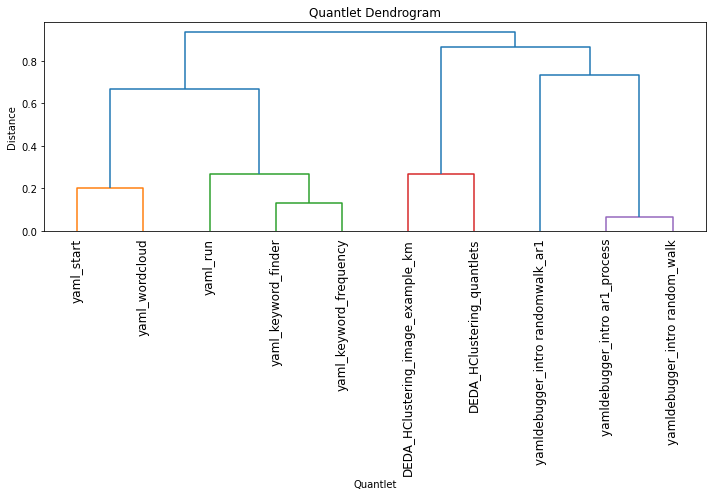

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X[-10:], method='single', metric='hamming')
dend = shc.dendrogram(Z, labels=labels[-10:], leaf_rotation=90) 
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_small.png', transparent=True)
d = pairwise_distances(train_X[-10:], metric='hamming')

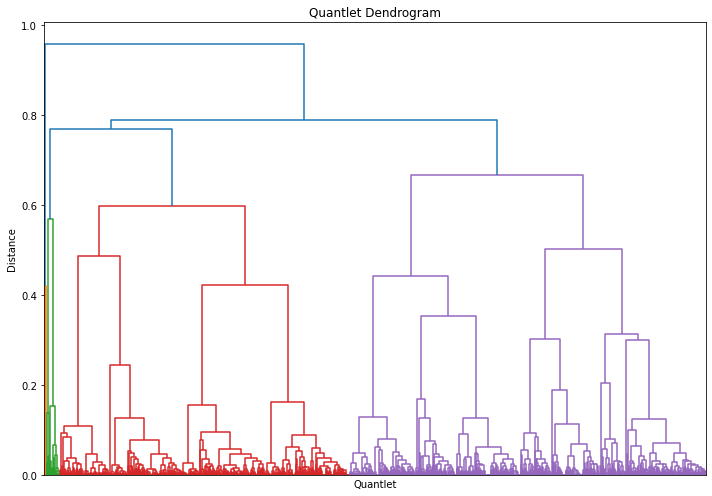

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X, method='average', metric='cosine')
dend = shc.dendrogram(Z, leaf_rotation=90, no_labels=True, count_sort=True)  
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_full.png', transparent=True)

In [11]:
clusters = fcluster(Z, 0.7, criterion='distance')

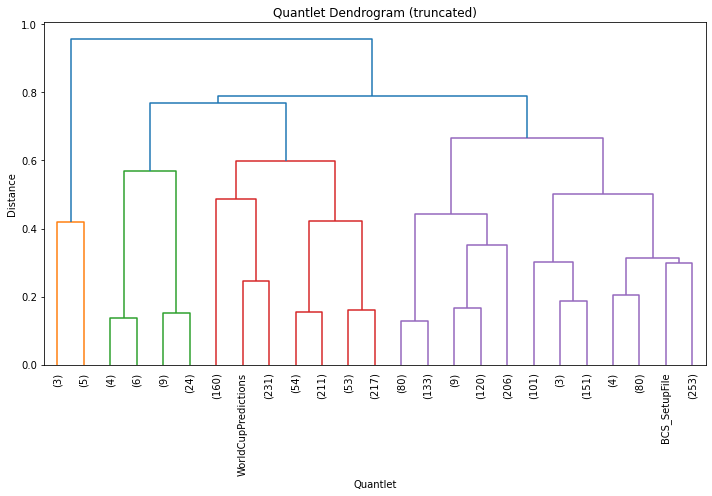

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram (truncated)")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X,  method='average', metric='cosine')
dend = shc.dendrogram(Z, truncate_mode='lastp', p=25, labels=labels, leaf_rotation=90, count_sort=True)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_trunc.png', transparent=True)

In [13]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [14]:
#Z = shc.linkage(train_X, method='average', metric='cosine')
max_d = 10
#clusters = fcluster(Z, max_d, criterion='maxclust')
cluster_labels = {}  
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)

# plot scatterplot with different clusters' amount

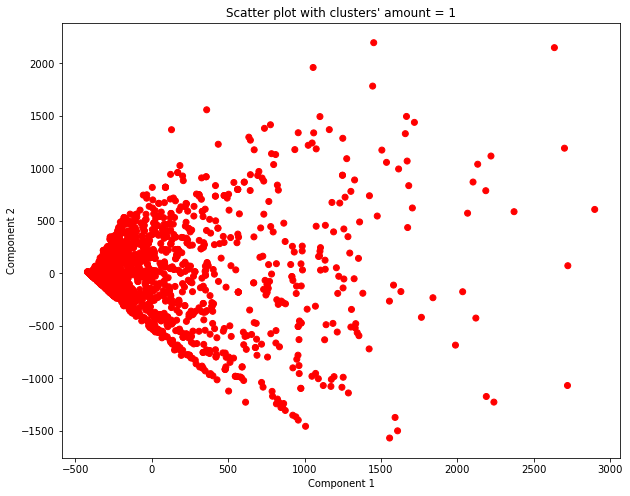

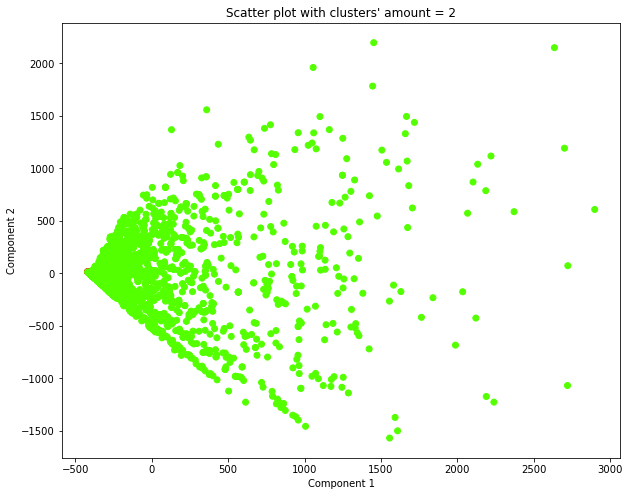

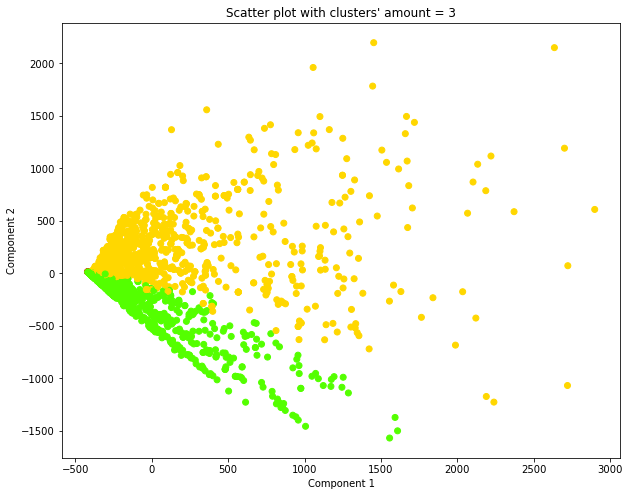

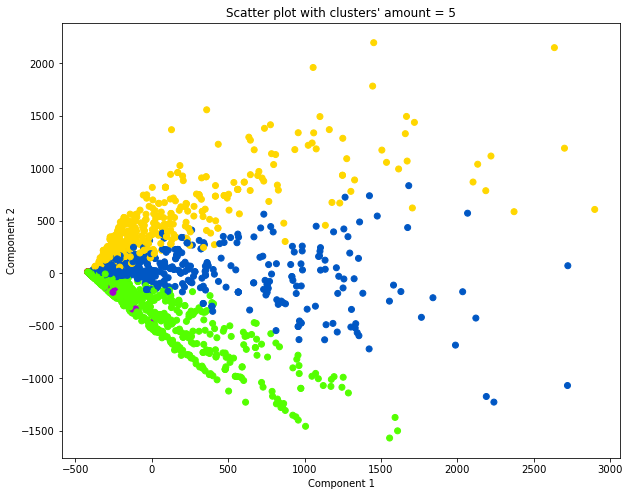

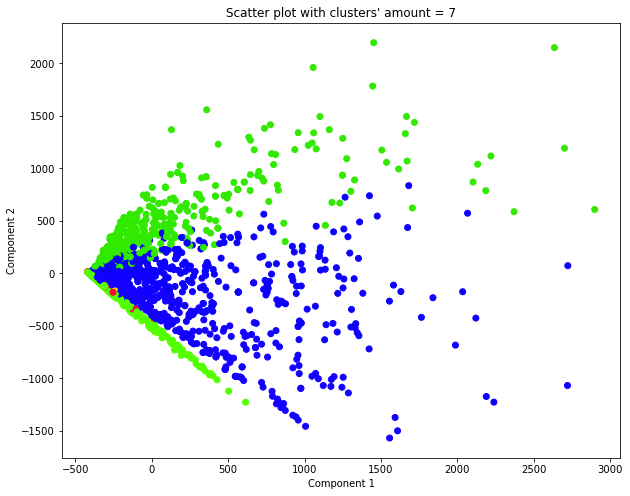

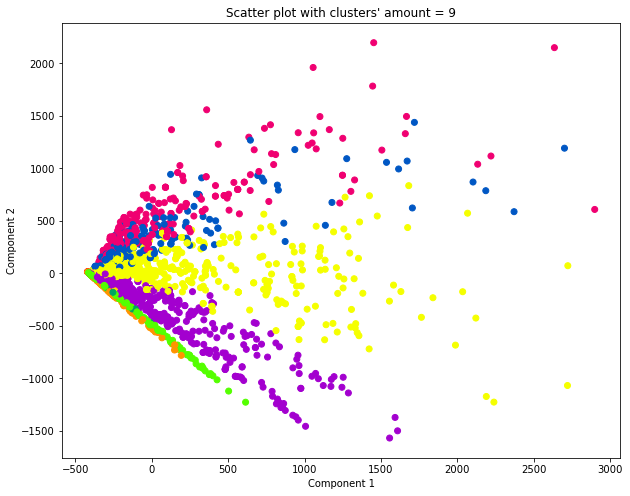

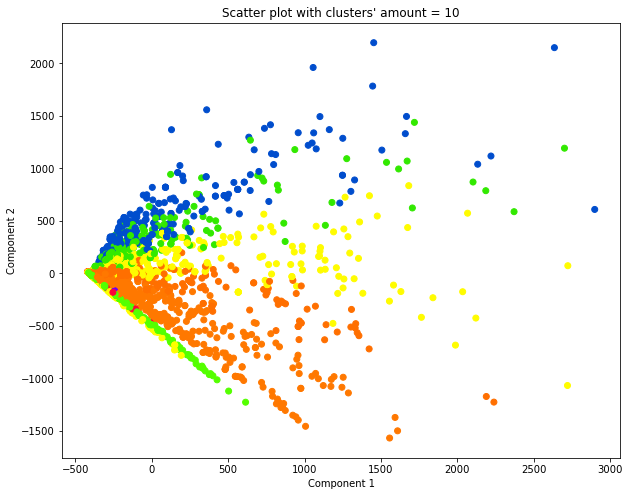

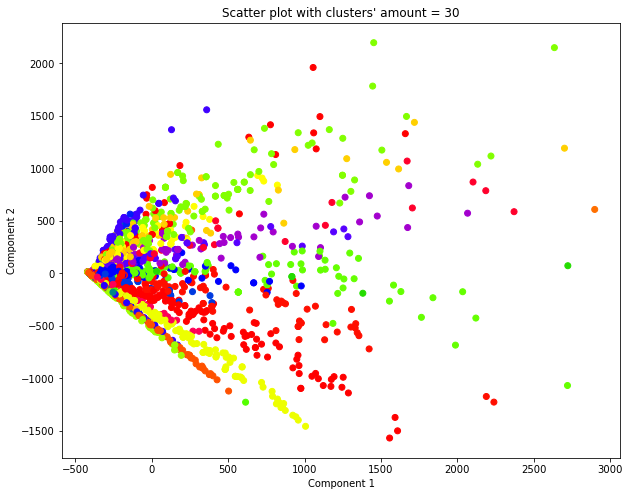

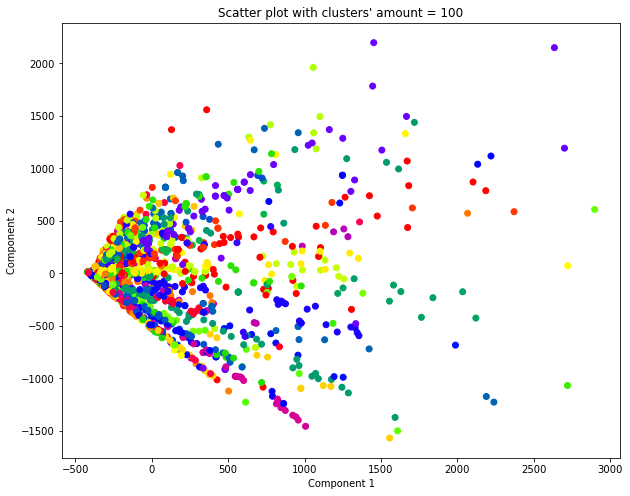

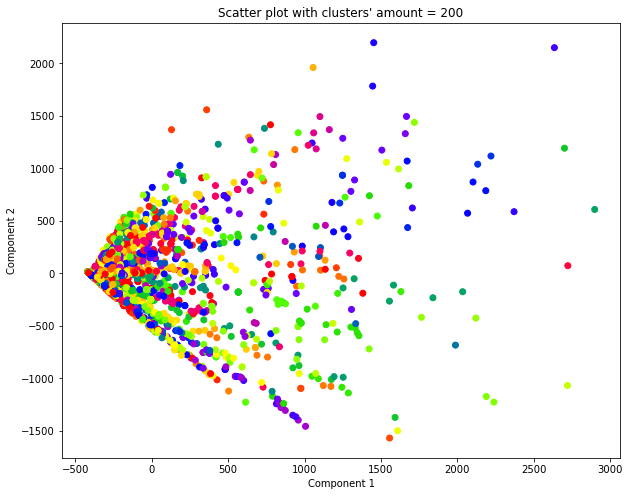

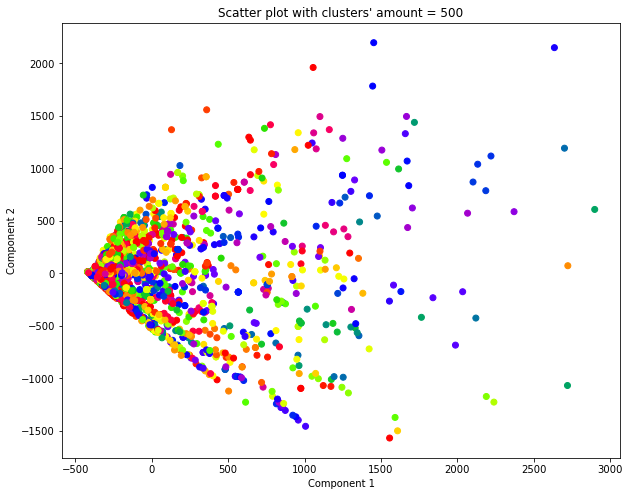

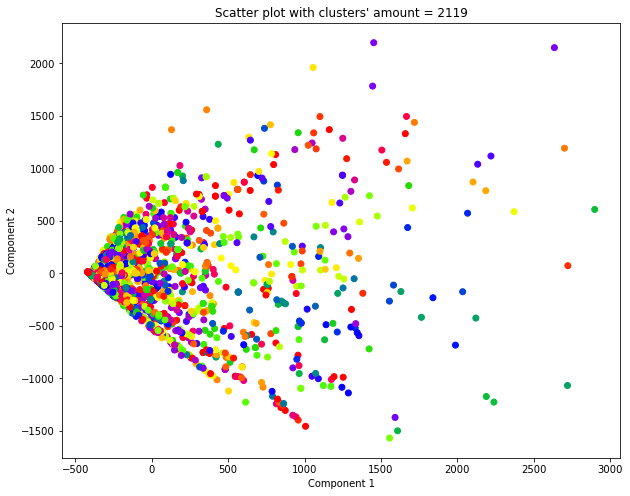

In [15]:
# prepare for plotting
pca = PCA(n_components=2)
pca.fit(train_X)
X = pca.transform(train_X)

for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'images/step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

# t-SNE clustering

In [16]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

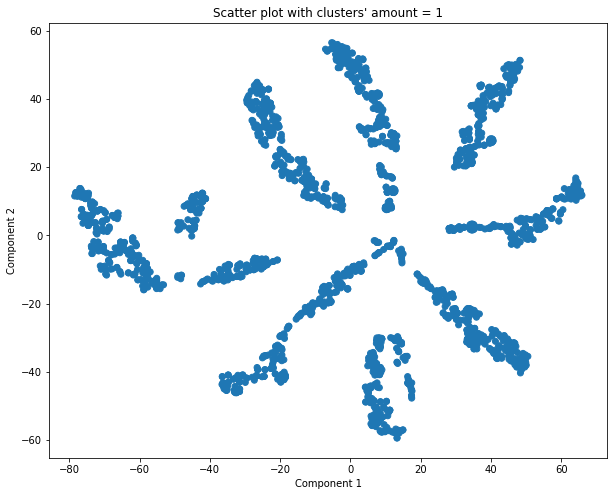

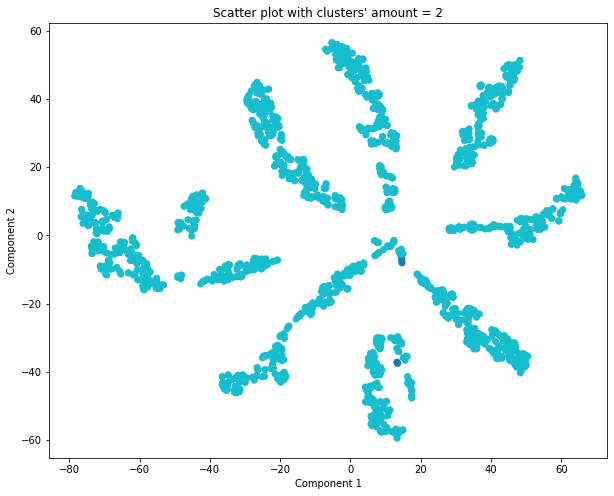

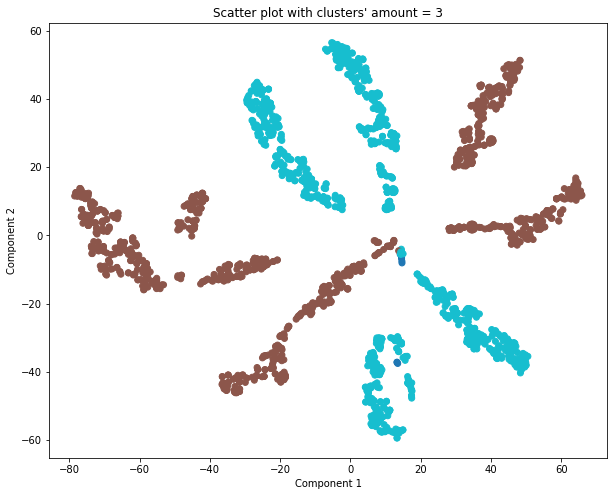

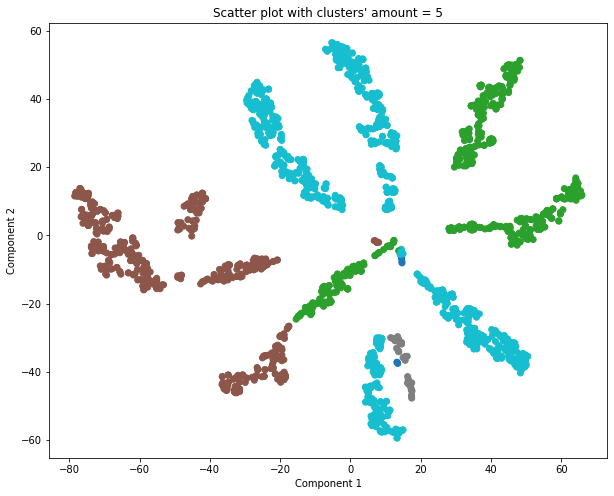

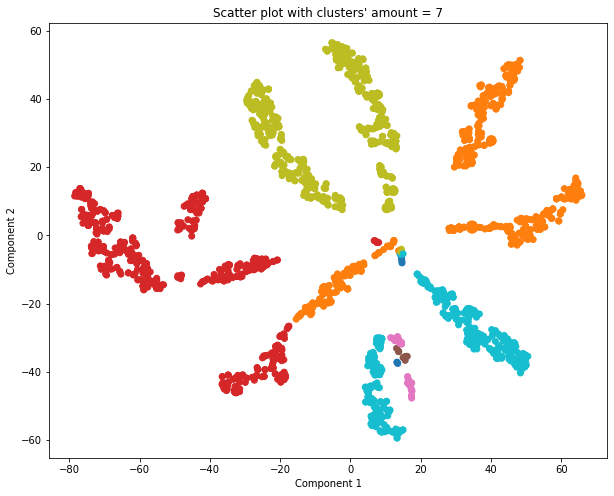

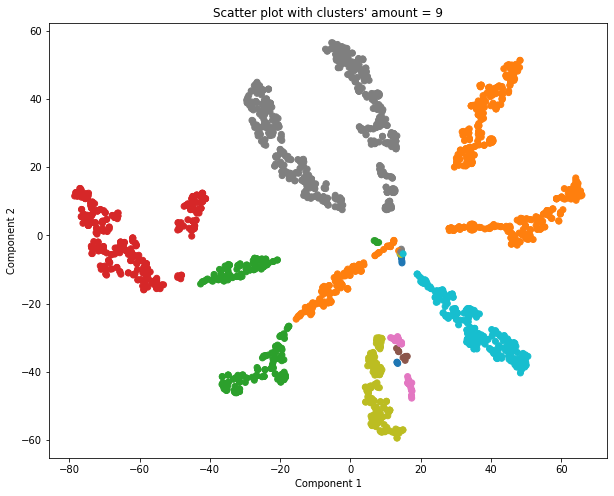

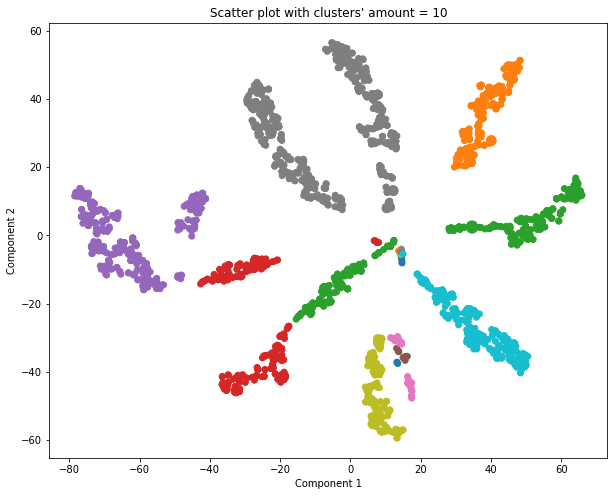

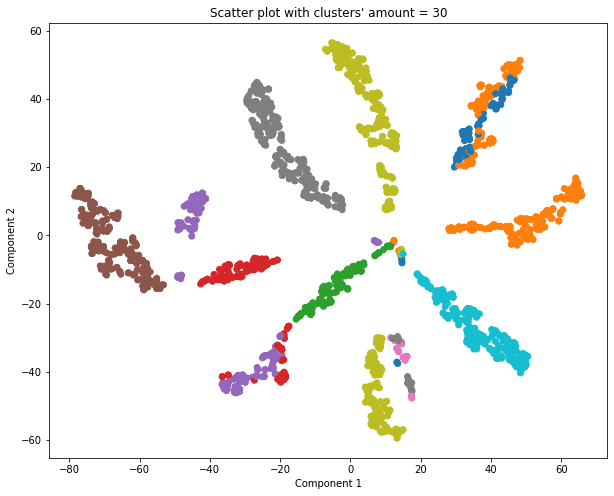

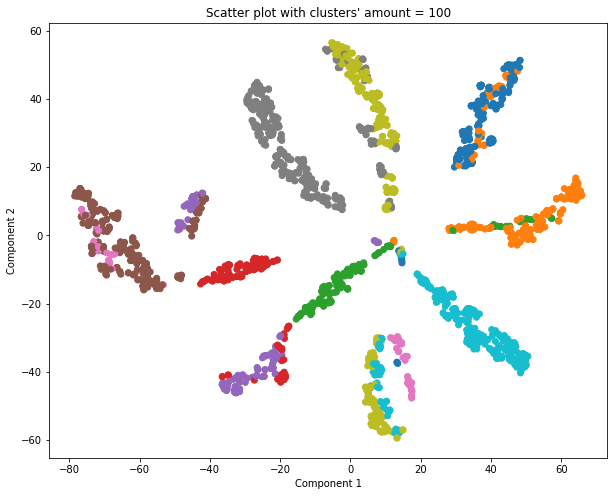

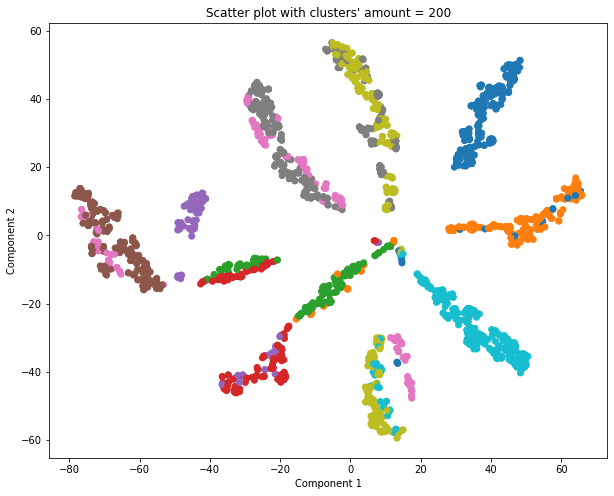

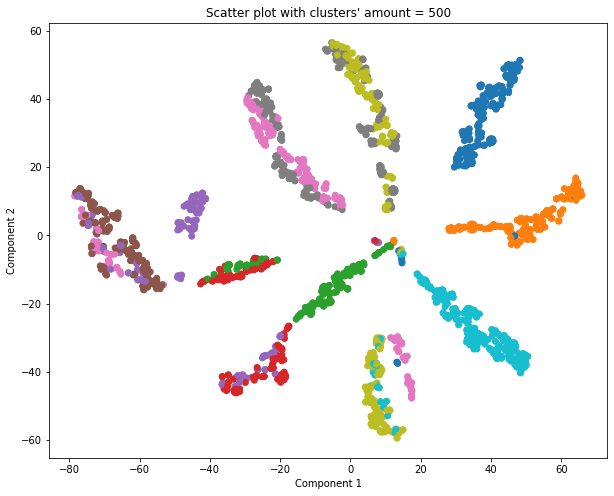

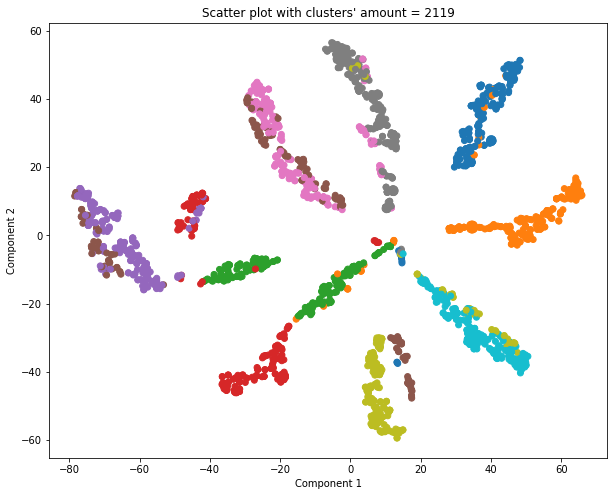

In [17]:
for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_t[:,0], X_t[:,1], c=clusters, cmap='tab10')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'images2/TSNE_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [18]:
max_d

2119

In [19]:
cluster_labels

{1: 'density kernel plot var algorithm networks animation hash worldmap',
 2: 'plot representation graphical data visualization financial series time estimation',
 3: 'distribution volatility stable estimation model regression autoregressive markov plot',
 4: 'plot graphical representation visualization distribution financial regression data time',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: ''}

<AxesSubplot:title={'center':"Scatter plot with clusters' amount = 10"}, xlabel='Component 1', ylabel='Component 2'>

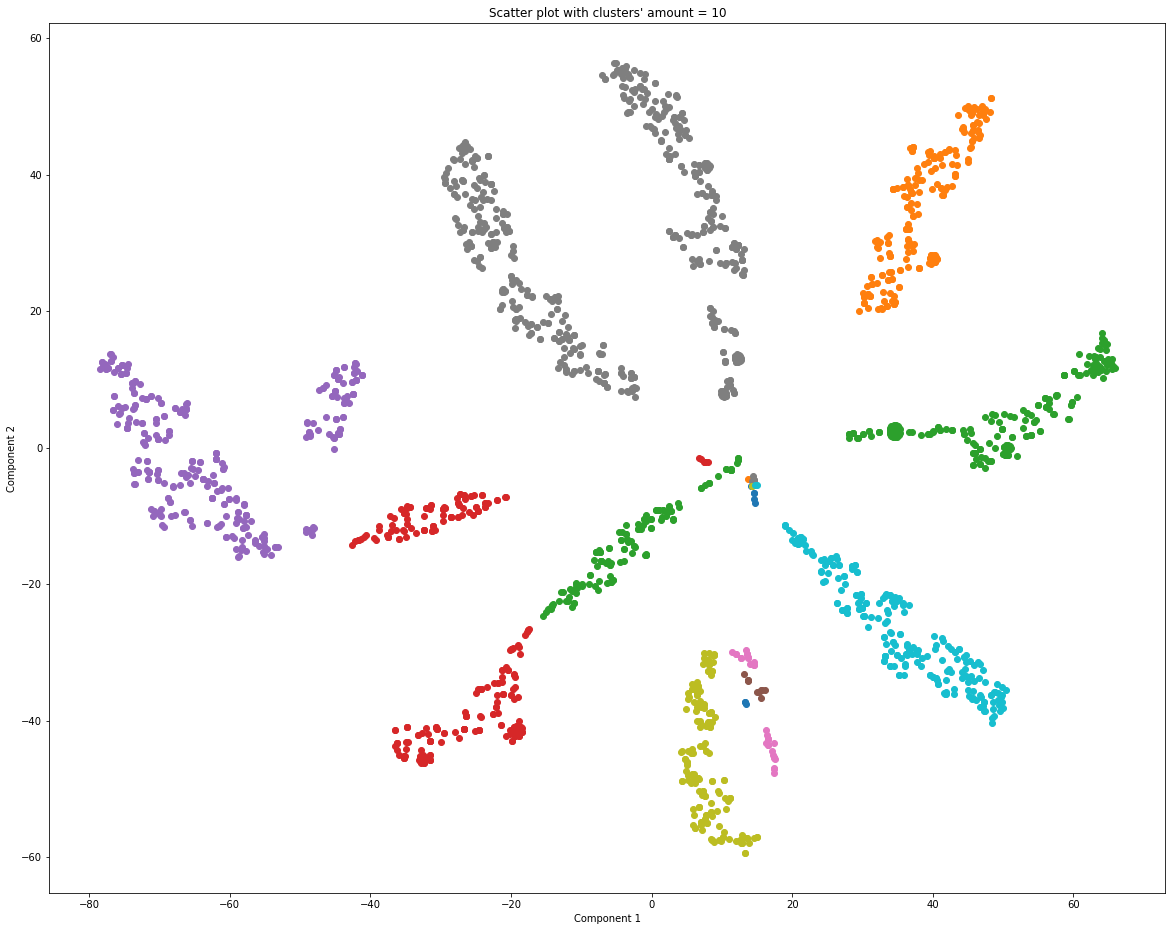

In [20]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()